In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('data.csv')
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [29]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<Axes: xlabel='INDUS', ylabel='Density'>

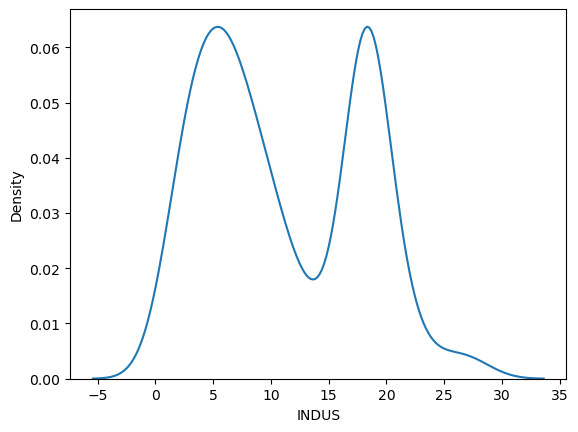

In [30]:
sns.kdeplot(df['INDUS'])

Above plot we can see that plot diversify.

<Axes: xlabel='RM', ylabel='Density'>

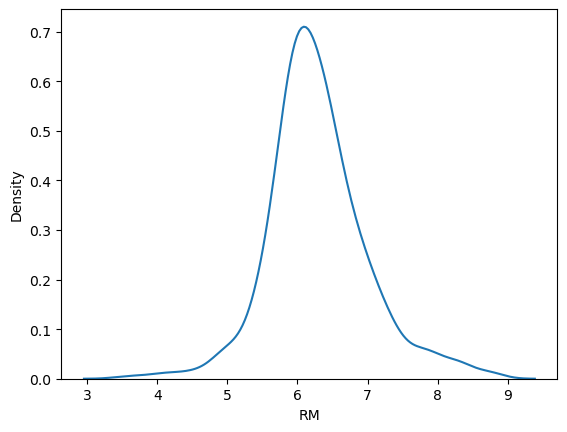

In [39]:
sns.kdeplot(df['RM'])

Also this plot is not in 0 to 1 range

<Axes: xlabel='INDUS', ylabel='RM'>

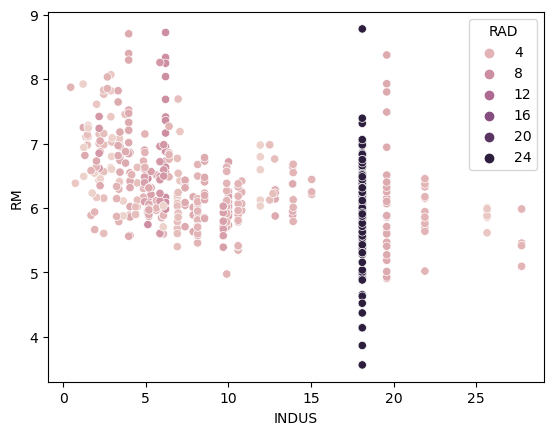

In [40]:
sns.scatterplot(x='INDUS',y='RM',hue='RAD',data=df)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('RAD', axis=1),
                                                    df['RAD'],
                                                    test_size=0.2,
                                                    random_state=0)

X_train.shape, X_test.shape

((408, 13), (103, 13))

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [43]:
np.round(X_train.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,408.0,408.0,408.0,408.0,408.0,405.0,408.0,408.0,408.0,408.0,408.0,408.0,408.0
mean,3.1,11.4,11.2,0.1,0.6,6.3,68.5,3.8,403.1,18.5,360.7,13.0,22.7
std,7.3,23.3,6.9,0.2,0.1,0.7,28.3,2.1,167.7,2.2,83.8,8.0,9.5
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,1.1,187.0,12.6,0.3,1.7,5.0
25%,0.1,0.0,5.1,0.0,0.5,5.9,44.9,2.1,277.0,17.0,374.7,6.9,16.8
50%,0.3,0.0,9.7,0.0,0.5,6.2,77.5,3.2,330.0,19.1,392.0,11.4,21.4
75%,3.2,13.8,18.1,0.0,0.6,6.6,93.9,5.2,666.0,20.2,396.1,17.2,25.0
max,73.5,100.0,27.7,1.0,0.9,8.8,100.0,12.1,711.0,23.0,396.9,76.0,67.0


In [44]:
np.round(X_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,408.0,408.0,408.0,408.0,408.0,405.0,408.0,408.0,408.0,408.0,408.0,408.0,408.0
mean,0.0,0.1,0.4,0.1,0.4,0.5,0.7,0.2,0.4,0.6,0.9,0.2,0.3
std,0.1,0.2,0.3,0.2,0.2,0.1,0.3,0.2,0.3,0.2,0.2,0.1,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.2,0.0,0.1,0.4,0.4,0.1,0.2,0.4,0.9,0.1,0.2
50%,0.0,0.0,0.3,0.0,0.3,0.5,0.8,0.2,0.3,0.6,1.0,0.1,0.3
75%,0.0,0.1,0.6,0.0,0.5,0.6,0.9,0.4,0.9,0.7,1.0,0.2,0.3
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


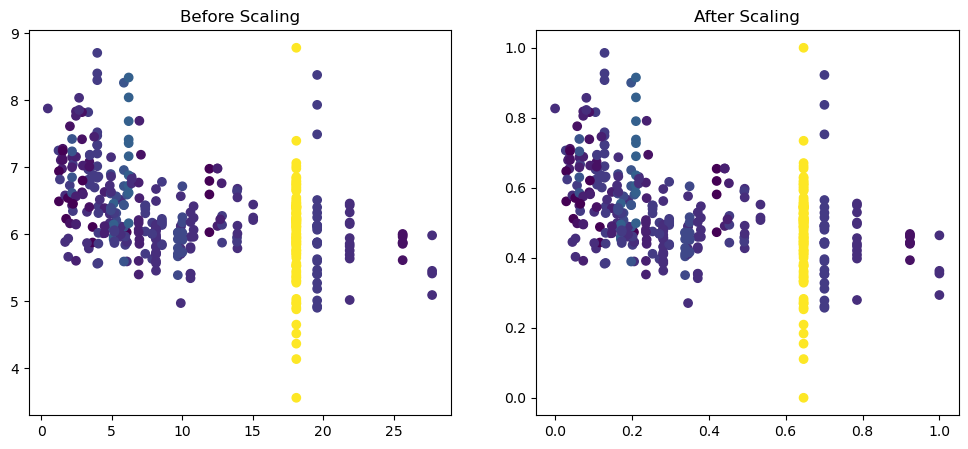

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['INDUS'], X_train['RM'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['INDUS'], X_train_scaled['RM'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

Above plot we can see that there is no difference between before and after plot.

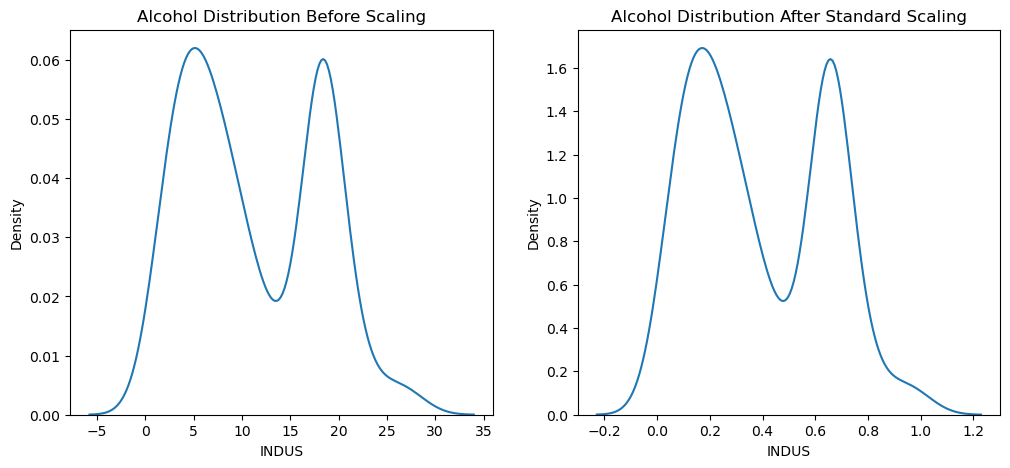

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['INDUS'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['INDUS'], ax=ax2)
plt.show()

Above plot we can see that theer is difference between the scale of the graph. 

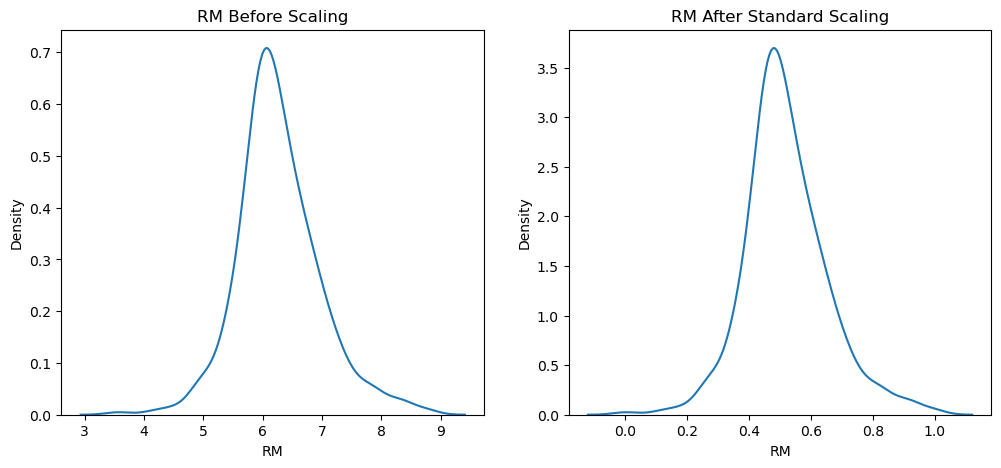

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('RM Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)

# after scaling
ax2.set_title('RM After Standard Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
plt.show()

In the plot we see can that RM after stanard scaling the RM is ranging from 0 to 1.